In [1]:
%matplotlib notebook
import flux

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# 100 points for a day
list_lst = np.linspace(0, 2 * np.pi, 100)
def day_array(ra, dec): #inefficient; don't care
    """
    @ra [float, radians]
    @dec [float, radians]
    """
    list_ra = []
    list_dec = []
    for lst in list_lst:
        ha = lst - ra
        if ha < 0:
            ha += 2 * np.pi
        list_ra.append(ha)
        list_dec.append(dec)
    return np.array([np.array(list_ra), np.array(list_dec)])

In [33]:
import random
obj_idx = int(random.random() * len(flux.catalog.obj_catalog))
print(obj_idx)
obj = flux.catalog.obj_catalog[obj_idx]

3248


In [34]:
obj_ra = np.radians(obj.ra_angle)
obj_dec = np.radians(obj.dec_angle)
obj_day = day_array(obj_ra, obj_dec)
obj_day[0]

array([2.13060487, 2.19407138, 2.2575379 , 2.32100442, 2.38447094,
       2.44793746, 2.51140398, 2.57487049, 2.63833701, 2.70180353,
       2.76527005, 2.82873657, 2.89220309, 2.9556696 , 3.01913612,
       3.08260264, 3.14606916, 3.20953568, 3.2730022 , 3.33646871,
       3.39993523, 3.46340175, 3.52686827, 3.59033479, 3.6538013 ,
       3.71726782, 3.78073434, 3.84420086, 3.90766738, 3.9711339 ,
       4.03460041, 4.09806693, 4.16153345, 4.22499997, 4.28846649,
       4.35193301, 4.41539952, 4.47886604, 4.54233256, 4.60579908,
       4.6692656 , 4.73273212, 4.79619863, 4.85966515, 4.92313167,
       4.98659819, 5.05006471, 5.11353122, 5.17699774, 5.24046426,
       5.30393078, 5.3673973 , 5.43086382, 5.49433033, 5.55779685,
       5.62126337, 5.68472989, 5.74819641, 5.81166293, 5.87512944,
       5.93859596, 6.00206248, 6.065529  , 6.12899552, 6.19246203,
       6.25592855, 0.03620976, 0.09967628, 0.1631428 , 0.22660932,
       0.29007584, 0.35354236, 0.41700887, 0.48047539, 0.54394

<IPython.core.display.Javascript object>


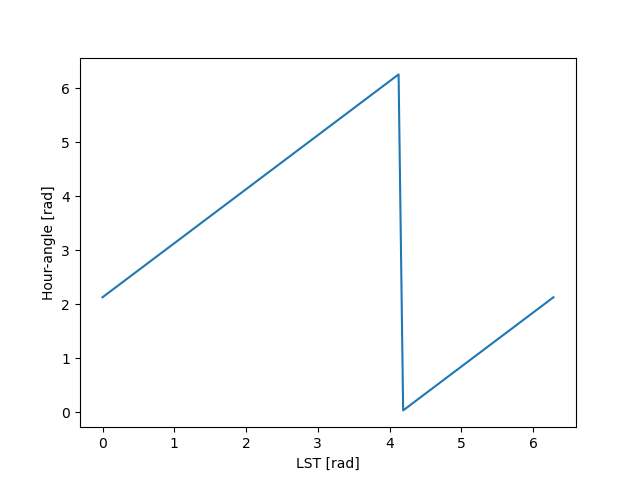

Text(0, 0.5, 'Hour-angle [rad]')

In [37]:
plt.plot(list_lst, obj_day[0])
plt.xlabel("LST [rad]")
plt.ylabel("Hour-angle [rad]")

<IPython.core.display.Javascript object>


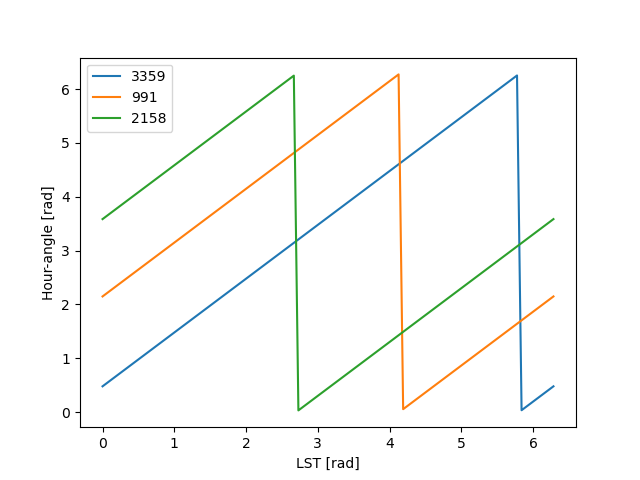

In [43]:
obj_count = 3

objs_ra = []

for i in range(0, obj_count):
    s_idx = int(random.random() * len(flux.catalog.obj_catalog))
    s = flux.catalog.obj_catalog[s_idx]
    s_ra = np.radians(s.ra_angle)
    objs_ra.append(day_array(s_ra, obj_dec)[0])
    
    plt.plot(list_lst, objs_ra[i], label=str(s_idx))

plt.xlabel("LST [rad]")
plt.ylabel("Hour-angle [rad]")
plt.legend()
plt.show()